**<span style="font-family:KerkisSans; font-size:2.5em;">Processing in Hyperspectral Images (HSIs)</span>**

* **<span style="font-family:KerkisSans; font-size:2.5em; color: red">Classification (supervised, unsupervised)</span>**

<span style="font-family:KerkisSans; font-size:1.5em; color: black">Anna Androvitsanea</span>

<span style="font-family:KerkisSans; font-size:1.5em; color: black">anna.androvitsanea@gmail.com</span>

**<span style="font-family:KerkisSans; font-size:2.5em;">Table of contents</span>**

* [Introduction](#Introduction)
    * [Import libraries](#Import-libraries)
    * [Import data](#Import-data-for-regression)
    * [Plot data](#Plots)
        * [Spectral signatures for 9 endmembers](#Spectral-signatures-for-9-endmembers)
        * [Spectral signatures for 9 endmembers](#section_1_2_2)
        * [Ground truth](#Ground-truth)
        * [Ground truth masked](#Ground-truth-masked)
        * [RGB Visualization of the 10th band](#RGB-Visualization-of-the-10th-band)
* [Part 2: Spectral unmixing (SU)](#Part-1:-Spectral-unmixing-(SU))
    * [Import data for classification](#Import-data-for-classification)
    * [Prepare data for classification](#Prepare-data-for-classification)
    * [Plots](#Plots)
    * [Scope](#Scopes)
    * [(A) Classification for each classifier](#(A)-Classification-for-each-classifier)
        * [Naive Bayes classifier](#Naive-Bayes-classifier)
        * [Minimum Euclidean distance classifier](#Minimum-Euclidean-distance-classifier)
        * [k-nearest neighbor classifier](#k-nearest-neighbor-classifier)
        * [Bayesian classifier](#Bayesian-classifier)
    * [(B) Comparison of classifiers](#(B)-Comparison-of-classifiers)

# Introduction

## Import libraries

In [1]:
# import libraries

import scipy.io as sio
import pandas as pd
import numpy as np
import scipy.optimize 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import norm
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import math
import mpl_toolkits.mplot3d.art3d as art3d
import matplotlib.colors as clr
from numpy import linalg as LA
from scipy.optimize import nnls 
from cvxopt import matrix, solvers
from scipy.spatial import distance
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from matplotlib.pyplot import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import MultiTaskLasso
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

## Import data for regression

In [2]:
# import data 

Pavia = sio.loadmat('PaviaU_cube.mat')
HSI = Pavia['X'] #Pavia HSI : 300x200x103

ends = sio.loadmat('PaviaU_endmembers.mat') # Endmember's matrix: 103x9
endmembers = ends['endmembers']

In [3]:
# import ground truth

ground_truth = sio.loadmat('PaviaU_ground_truth.mat')
labels = ground_truth['y']

## Plots

### Spectral signatures for 9 endmembers

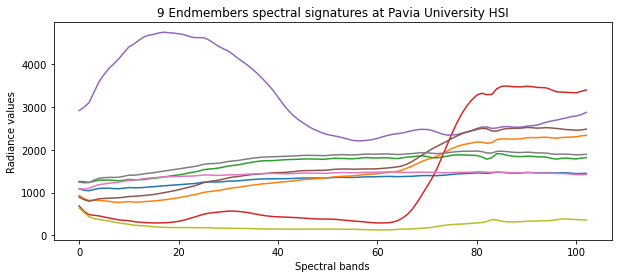

In [4]:
# plot spectral signatures for 9 endmembers

fig = plt.figure(figsize=(10,4))
plt.plot(endmembers)
plt.ylabel('Radiance values')
plt.xlabel('Spectral bands')
plt.title('9 Endmembers spectral signatures at Pavia University HSI')
plt.show()

### Spectral signatures for each endmember

In [5]:
# make a dict mapping the 9 endmembers to the corresponding material name

materials = {0: 'unknown',
             1: 'Water',
             2: 'Trees',
             3: 'Asphalt',
             4: 'Bricks',
             5: 'Bitumen',
             6: 'Tiles',
             7: 'Shadows',
             8: 'Meadows',
             9: 'Bare Soil'}

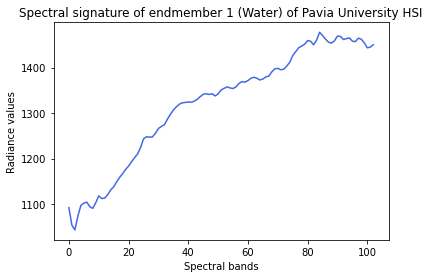

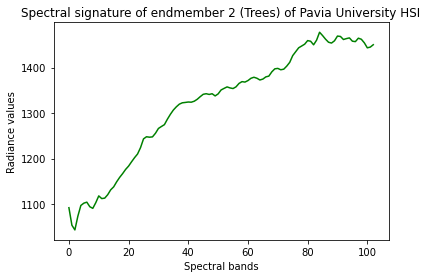

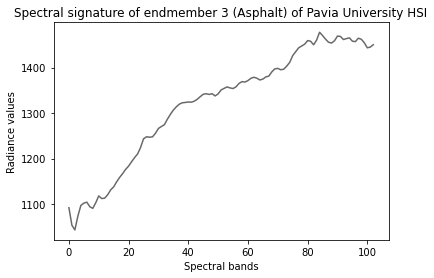

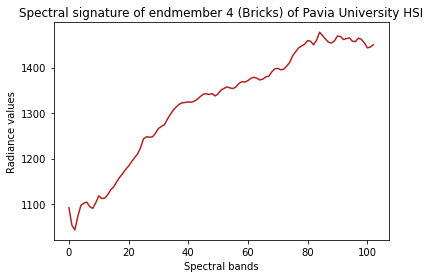

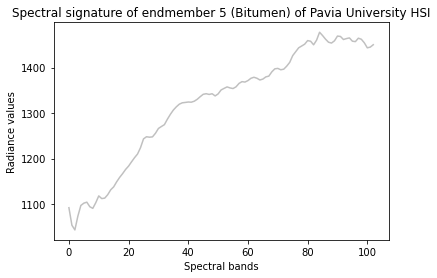

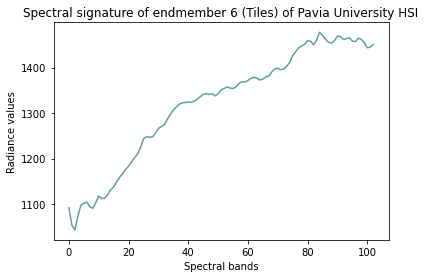

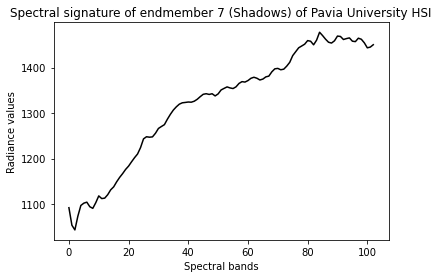

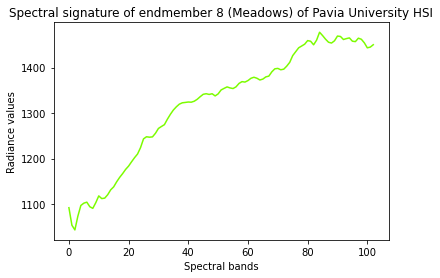

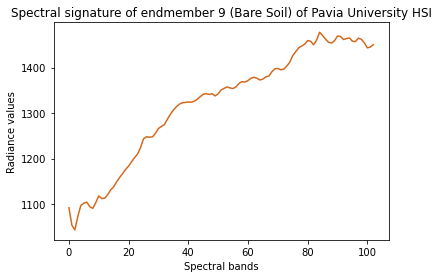

In [6]:
# Plot the spectral signature for each endmember


fig = plt.figure()
colors = ['royalblue','green','dimgray','firebrick', 'silver',
          'cadetblue','black','lawngreen', 'chocolate']
for i in range (0,9):
    plt.plot(endmembers[:,0], c=colors[i])
    plt.ylabel('Radiance values')
    plt.xlabel('Spectral bands')
    plt.title('Spectral signature of endmember %d (%s) of Pavia University HSI' % (i+1, materials[i+1]))
    plt.show()

### Ground truth

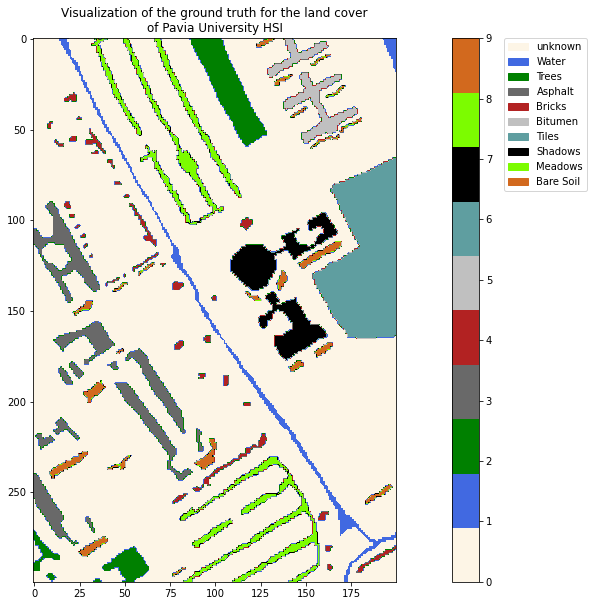

In [7]:
# plot labels, icluding zero values

plt.figure(figsize=(20,10)) # set fig size

# make a dict to assign a distinct color to each material/surface
color_dict= {0: 'oldlace', 1: 'royalblue', 2: 'green', 3: 'dimgray', 4: 'firebrick', 5: 'silver',
             6: 'cadetblue', 7: 'black', 8: 'lawngreen', 9: 'chocolate'}
cmaps_shuffle = {1:'Blues',2:'Greens',3:'Greys', 4:'Oranges', 5:'gist_yarg', 
               6:'Purples',7:'Greys',8:'Greens',9:'YlOrBr'}

# make a color map form the dict
cmap = ListedColormap([color_dict[x] for x in color_dict.keys()])

# make a legend based on the color and material
patches = [mpatches.Patch(color=color_dict[i],label = materials[i]) for i in range(0,10)]

plt.legend(handles=patches, bbox_to_anchor = (1.3, 1), loc=2, borderaxespad=0. )

plt.imshow(labels, cmap = cmap) # plot the array

plt.title('Visualization of the ground truth for the land cover\nof Pavia University HSI')

plt.colorbar() # plot the color bar

plt.savefig('ground_truth_raw.png') # save figure

### Ground truth masked

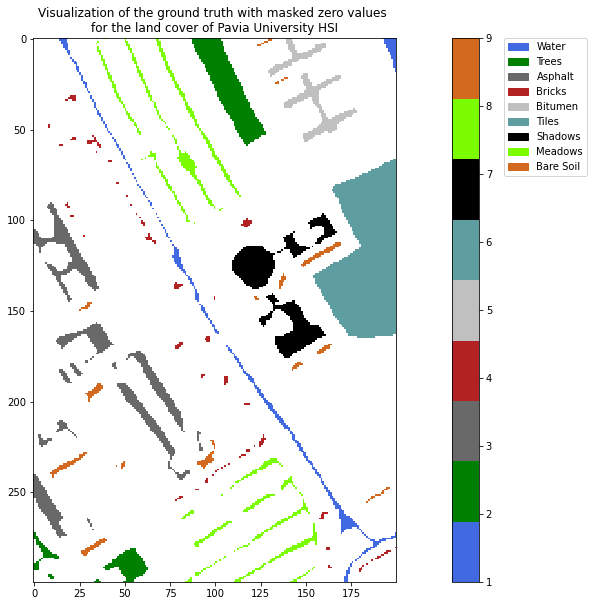

In [8]:
# plot labels without the zero values

X = np.ma.masked_equal(labels, 0) # mask zero values 


plt.figure(figsize=(20,10)) # set fig size

# make a dict to assign a distinct color to each material/surface
color_dict_masked = {1: 'royalblue', 2: 'green', 3: 'dimgray', 4: 'firebrick', 5: 'silver',
                     6: 'cadetblue', 7: 'black', 8: 'lawngreen', 9: 'chocolate'}

materials_masked = {1: 'Water',
                    2: 'Trees',
                    3: 'Asphalt',
                    4: 'Bricks',
                    5: 'Bitumen',
                    6: 'Tiles',
                    7: 'Shadows',
                    8: 'Meadows',
                    9: 'Bare Soil'}

# make a color map form the dict
cmap_masked = ListedColormap([color_dict_masked[x] for x in color_dict_masked.keys()])

# make a legend based on the color and material
patches_masked =[mpatches.Patch(color=color_dict_masked[i],label=materials_masked[i]) for i in range(1,10)]

plt.legend(handles=patches_masked, bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0. )

plt.imshow(X, cmap = cmap_masked) # plot the array

plt.title('Visualization of the ground truth with masked zero values \nfor the land cover of Pavia University HSI')

plt.colorbar() # plot the color bar

plt.savefig('ground_truth_raw_masked.png') # save figure

### RGB Visualization of the 10th band

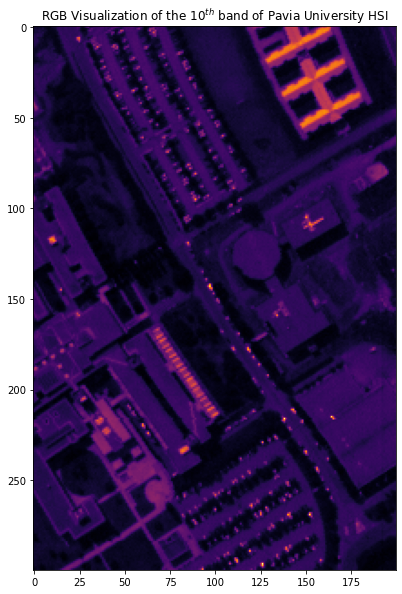

In [9]:
# plot data
plt.figure(figsize=(20,10))


plt.imshow(HSI[:,:,10], cmap = 'inferno')
plt.title('RGB Visualization of the $10^{th}$ band of Pavia University HSI')
plt.show()

# Part 2: Classification

## Import data for classification

In [10]:
# Trainining set for classification 

# import data
Pavia_labels = sio.loadmat('classification_labels_Pavia.mat')

# prepare test set
Test_Set = (np.reshape(Pavia_labels['test_set'],(200,300))).T

# prepare operational set
Operational_Set = (np.reshape(Pavia_labels['operational_set'],(200,300))).T

# prepare training set
Training_Set = (np.reshape(Pavia_labels['training_set'],(200,300))).T

## Prepare data for classification

In [11]:
# compute the indexes in order to exclude zero values

train = np.where(Training_Set != 0)
test = np.where(Test_Set != 0)
operate = np.where(Operational_Set != 0)

In [12]:
# apply index to exlude zero values
# prepare the endmembers datasets

train_labels = Training_Set[train[0], train[1]]
test_labels = Test_Set[test[0], test[1]]
operate_label = Operational_Set[operate[0], operate[1]]

len(train_labels), len(test_labels), len(operate_label)

(6415, 3207, 3207)

In [13]:
# apply index to exlude zero values
# prepare the pixels datasets

train_hsi = HSI[train[0], train[1],:]
test_hsi = HSI[test[0], test[1],:]
operate_hsi = HSI[operate[0], operate[1]]

len(train_hsi), len(test_hsi), len(operate_hsi)

(6415, 3207, 3207)

In [14]:
# Indices (rows and columns) stored in 2 arrays, corresponding to non-zero labels
# in the train and test sets respectively.
non_zero_train = np.where(Training_Set!=0)
non_zero_test = np.where(Test_Set!=0)

training_labels = Training_Set[non_zero_train[0],non_zero_train[1]]
training_pixels = HSI[non_zero_train[0],non_zero_train[1],:]

test_labels = Test_Set[non_zero_test[0],non_zero_test[1]]
test_pixels = HSI[non_zero_test[0],non_zero_test[1],:]

## Plots

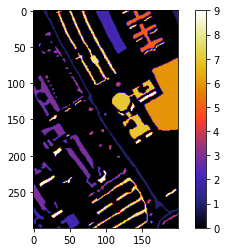

In [15]:
# Plot labels
plt.imshow(labels, cmap = 'CMRmap') # plot the array
plt.colorbar() # plot the color bar

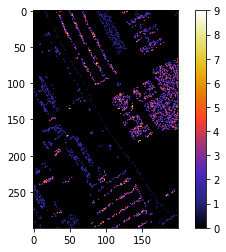

In [16]:
# Plot test set
plt.imshow(Test_Set, cmap = 'CMRmap') # plot the array
plt.colorbar() # plot the color bar

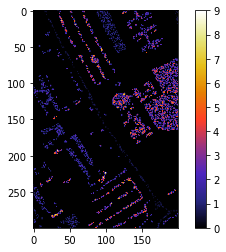

In [17]:
# Plot dev set
plt.imshow(Operational_Set, cmap = 'CMRmap') # plot the array
plt.colorbar() # plot the color bar

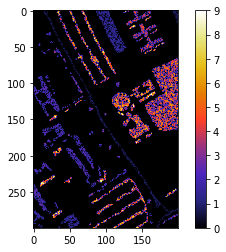

In [18]:
# Plot training set
plt.imshow(Training_Set, cmap = 'CMRmap') # plot the array
plt.colorbar() # plot the color bar

## Scope

The task is to assign each one of them to the most appropriate class among the 9 known endmembers (classes). 

The classification is perfomed with **four** pre-chosen classifiers:

The [first step](#(A)-Classification-for-each-classifier) is the performance of a 10-fold cross validation for each classifier. For this step the estimated validation error gets reported.

The second step is the training of each classifier and the evaluation of its performance. This includes the computation of the confusion matrix and the success rate of the classifier.

[Finally](#(B)-Comparison-of-classifiers) I compare the results of the four classifiers.



## (A) Classification for each classifier

### Naive Bayes classifier

#### (i) Cross validation

In [19]:
cv_naive_bayes = cross_val_score(GaussianNB(), 
                                X = train_hsi, 
                                y = train_labels, 
                                cv = StratifiedKFold(n_splits = 10, 
                                                     shuffle = True))
error_naive_bayes = 1 - cv_naive_bayes

print('The Naive Bayes classifier produces an estimated validation error with mean %.4f and standard deviation %.4f' % 
      (error_naive_bayes.mean(), error_naive_bayes.std()))

The Naive Bayes classifier produces an estimated validation error with mean 0.3400 and standard deviation 0.0151


#### (ii) Confusion Matrix & success rate

In [20]:
# train model, predict for test labels
# calculate the confusion matrix and success rate

model_naive_bayes = GaussianNB().fit(train_hsi, 
                                     train_labels).predict(test_hsi)

naive_confusion_m = confusion_matrix(test_labels,
                                     model_naive_bayes)

success_naive_bayes = naive_confusion_m.trace() / naive_confusion_m.sum()

print('The Naive Bayes classifier has a success rate of %.4f.' % success_naive_bayes)

The Naive Bayes classifier has a success rate of 0.6601.


In [21]:
# view the confusion matrix

pd.DataFrame(naive_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,131,0,37,0,0,0,80,13,0
Trees,0,326,4,6,0,17,0,0,0
Asphalt,25,2,127,0,0,13,70,299,0
Bricks,0,0,0,154,1,1,0,0,0
Bitumen,0,0,1,0,166,1,0,0,0
Tiles,0,312,2,55,32,363,0,0,0
Shadows,18,0,26,0,0,0,277,0,0
Meadows,2,1,67,0,0,1,2,388,0
Bare Soil,0,0,0,2,0,0,0,0,185


### Minimum Euclidean distance classifier

#### (i) Cross validation

In [22]:
folds_eucl = StratifiedKFold(n_splits = 10,
                             shuffle = True).split(train_hsi,
                                                   train_labels)

def average_value(endmember, pixel):
    average = np.zeros((9,103))
    for label in range(1,10):
        class_index = np.where(endmember == label)[0]
        class_points  = pixel[class_index]
        class_average = class_points.mean(axis=0)
        average[label - 1,:] = class_average
                               
    return average

errors_euclidean = []

for fold in folds_eucl:
    temp_train_hsi = train_hsi[fold[0]]
    temp_train_labels = train_labels[fold[0]]
    temp_val_pixels = train_hsi[fold[1]]
    temp_val_labels = train_labels[fold[1]]
                                 
    # Average value for each endmember
    # Temporar training set
    temp_average = average_value(temp_train_labels,
                                    temp_train_hsi)
    
    # Distances between temporar training set and validation set.
    temp_distances = distance.cdist(temp_average, 
                                    temp_val_pixels)

    # Predict based on the minimum distance. 

   
    temp_predictions = temp_distances.argmin(axis=0) + 1
    temp_confusion_m = confusion_matrix(temp_val_labels,
                                        temp_predictions)
    
    cv_euclidean = (temp_confusion_m.trace() / temp_confusion_m.sum())
    temp_error = 1 - cv_euclidean
    
    errors_euclidean.append(temp_error)
    
errors_euclidean_ar = np.array(errors_euclidean)
    
print('The minimum Euclidean distance classifer produces an estimated validation error with mean %.4f and standard deviation %.4f' % 
      (errors_euclidean_ar.mean(), errors_euclidean_ar.std()))

The minimum Euclidean distance classifer produces an estimated validation error with mean 0.4332 and standard deviation 0.0242


#### (ii) Confusion Matrix & success rate

In [23]:
# train model, predict for test labels
# calculate the confusion matrix and success rate

average = np.zeros((9,103))
for label in range(1,10):
    class_index = np.where(Training_Set == label)
    class_points  = HSI[class_index[0],class_index[1],:]
    class_average = class_points.mean(axis=0)
    average[label - 1,:] = class_average

distances = distance.cdist(average, test_hsi)
minimum_distances_pred = distances.argmin(axis=0) + 1

euclidean_confusion_m = confusion_matrix(test_labels,
                                         minimum_distances_pred)

success_euclidean = euclidean_confusion_m.trace() / euclidean_confusion_m.sum()

print('The Minimum Euclidean Distance classifier has a success rate of %.4f.' 
      % success_euclidean)

The Minimum Euclidean Distance classifier has a success rate of 0.5578.


In [24]:
# view the confusion matrix

pd.DataFrame(euclidean_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,152,0,46,0,0,0,61,2,0
Trees,1,188,0,5,0,156,0,3,0
Asphalt,66,2,198,0,0,1,39,230,0
Bricks,0,0,0,154,0,0,0,0,2
Bitumen,0,0,0,0,128,0,0,40,0
Tiles,11,317,0,12,16,240,0,168,0
Shadows,61,0,23,0,0,0,237,0,0
Meadows,2,1,145,0,0,1,7,305,0
Bare Soil,0,0,0,0,0,0,0,0,187


### k-nearest neighbor classifier

#### (i) Cross validation

In [25]:
cv_knn = cross_val_score(KNeighborsClassifier(7), 
                                X = train_hsi, 
                                y = train_labels, 
                                cv = StratifiedKFold(n_splits = 10, 
                                                     shuffle = True))
error_kk = 1 - cv_knn

print('The k-nearest neighbor classifier produces an estimated validation error with mean %.4f and standard deviation %.4f' % 
      (error_kk.mean(), error_kk.std()))

The k-nearest neighbor classifier produces an estimated validation error with mean 0.1197 and standard deviation 0.0093


#### (ii) Confusion Matrix & success rate

In [26]:
# train model, predict for test labels
# calculate the confusion matrix and success rate

neigh_classifier = KNeighborsClassifier(n_neighbors = 7)
model_kneigh = neigh_classifier.fit(train_hsi,
                                    train_labels).predict(test_hsi)

knn_confusion_m = confusion_matrix(test_labels, model_kneigh)

success_knn = knn_confusion_m.trace() / knn_confusion_m.sum()

print('The k-nearest neighbor classifier has a success rate of %.4f.' 
      % success_knn)

The k-nearest neighbor classifier has a success rate of 0.8884.


In [27]:
# view the confusion matrix

pd.DataFrame(knn_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,192,0,10,0,0,0,26,33,0
Trees,0,325,0,1,0,27,0,0,0
Asphalt,10,2,454,0,0,4,1,65,0
Bricks,0,0,0,155,0,1,0,0,0
Bitumen,0,0,1,0,166,0,0,1,0
Tiles,0,59,1,0,1,701,0,2,0
Shadows,11,0,3,0,0,0,304,3,0
Meadows,8,2,84,0,0,0,2,365,0
Bare Soil,0,0,0,0,0,0,0,0,187


### Bayesian classifier

#### (i) Cross validation

In [28]:

cv_bayes = cross_val_score(QuadraticDiscriminantAnalysis(), 
                                X = train_hsi, 
                                y = train_labels, 
                                cv = StratifiedKFold(n_splits = 10, 
                                                     shuffle = True))
error_bayes = 1 - cv_bayes

print('The Bayes classifier produces an estimated validation error with mean %.4f and standard deviation %.4f' % 
      (error_bayes.mean(), error_bayes.std()))

The Bayes classifier produces an estimated validation error with mean 0.1182 and standard deviation 0.0152


#### (ii) Confusion Matrix & success rate

In [29]:
# train model, predict for test labels
# calculate the confusion matrix and success rate

module_bayes = QuadraticDiscriminantAnalysis().fit(train_hsi,
                                                   train_labels)
model_bayes = module_bayes.predict(test_hsi)

bayes_confusion_m = confusion_matrix(test_labels,
                                     model_bayes)

success_bayes = bayes_confusion_m.trace() / bayes_confusion_m.sum()

print('The Bayes classifier has a success rate of %.4f.' % success_bayes)

The Bayes classifier has a success rate of 0.8843.


In [30]:
# view the confusion matrix

pd.DataFrame(bayes_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,155,0,46,0,0,2,10,48,0
Trees,0,328,0,3,0,22,0,0,0
Asphalt,10,1,430,0,0,0,0,95,0
Bricks,0,0,0,154,0,2,0,0,0
Bitumen,0,0,0,0,168,0,0,0,0
Tiles,0,1,0,1,0,762,0,0,0
Shadows,14,0,10,0,0,2,291,4,0
Meadows,19,0,73,0,0,2,0,367,0
Bare Soil,3,0,0,1,2,0,0,0,181


## (B) Comparison of classifiers

### Estimated validation error

In [31]:
print('Naive Bayes: {:>20} = {:>1}, standard deviation = {:>5}' .format('mean',
                                                                        round(error_naive_bayes.mean(),4), 
                                                                        round(error_naive_bayes.std(), 4)))
print('Minimum Euclidean distance : mean = {:>5}, standard deviation = {:>5}' .format(round(errors_euclidean_ar.mean(),4), 
                                                                        round(errors_euclidean_ar.std(), 4)))

print('K-nearest neighbor: {:>13} = {:>1}, standard deviation = {:>5}' .format('mean',
                                                                        round(error_kk.mean(),4), 
                                                                        round(error_kk.std(), 4)))

print('Bayesian: {:>23} = {:>1}, standard deviation = {:>5}' .format('mean',
                                                                     round(error_bayes.mean(),4), 
                                                                     round(error_bayes.std(), 4)))

Naive Bayes:                 mean = 0.34, standard deviation = 0.0151
Minimum Euclidean distance : mean = 0.4332, standard deviation = 0.0242
K-nearest neighbor:          mean = 0.1197, standard deviation = 0.0093
Bayesian:                    mean = 0.1182, standard deviation = 0.0152


The **Bayesian method** has the **smallest** mean value of validation error as well as the smallest deviation.

After that comes the **K-nearest neighbor** classifier.

### Confusion matrices and success rates

In [32]:
# view the confusion matrix

pd.DataFrame(naive_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,131,0,37,0,0,0,80,13,0
Trees,0,326,4,6,0,17,0,0,0
Asphalt,25,2,127,0,0,13,70,299,0
Bricks,0,0,0,154,1,1,0,0,0
Bitumen,0,0,1,0,166,1,0,0,0
Tiles,0,312,2,55,32,363,0,0,0
Shadows,18,0,26,0,0,0,277,0,0
Meadows,2,1,67,0,0,1,2,388,0
Bare Soil,0,0,0,2,0,0,0,0,185


In [33]:
print('The Naive Bayes classifier has a success rate of %.4f.' % success_naive_bayes)

The Naive Bayes classifier has a success rate of 0.6601.


The **Naive Bayes** classifier performs a little more than the average, with a success rate of 66 %.
I notice that types of land cover such as trees, bricks, bitumen, shadows and bare soil get identified very well, while some other types are misidentified, ie asphalt is very often identified as meadows or tiles are trees.

In [34]:
# view the confusion matrix

pd.DataFrame(euclidean_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,152,0,46,0,0,0,61,2,0
Trees,1,188,0,5,0,156,0,3,0
Asphalt,66,2,198,0,0,1,39,230,0
Bricks,0,0,0,154,0,0,0,0,2
Bitumen,0,0,0,0,128,0,0,40,0
Tiles,11,317,0,12,16,240,0,168,0
Shadows,61,0,23,0,0,0,237,0,0
Meadows,2,1,145,0,0,1,7,305,0
Bare Soil,0,0,0,0,0,0,0,0,187


In [35]:
print('The Minimum Euclidean Distance classifier has a success rate of %.4f.' 
      % success_euclidean)

The Minimum Euclidean Distance classifier has a success rate of 0.5578.


The **Minimum Euclidean Distance** classifier performs just a bit above 50 %. Most types of land cover are misidentified, with the only exception being the Bare soil.

In [36]:
# view the confusion matrix

pd.DataFrame(knn_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,192,0,10,0,0,0,26,33,0
Trees,0,325,0,1,0,27,0,0,0
Asphalt,10,2,454,0,0,4,1,65,0
Bricks,0,0,0,155,0,1,0,0,0
Bitumen,0,0,1,0,166,0,0,1,0
Tiles,0,59,1,0,1,701,0,2,0
Shadows,11,0,3,0,0,0,304,3,0
Meadows,8,2,84,0,0,0,2,365,0
Bare Soil,0,0,0,0,0,0,0,0,187


In [37]:
print('The k-nearest neighbor classifier has a success rate of %.4f.' 
      % success_knn)

The k-nearest neighbor classifier has a success rate of 0.8884.


The **k-nearest neighbor** classifier performs very well with a success rate close to 90%. Bare soil is in all case correctly identified, while most of the types of land cover are also correctly attributed to the relevant pixel. The only outliner is the type Meadows that is identified as Asphalt in many cases. 

In [38]:
# view the confusion matrix

pd.DataFrame(bayes_confusion_m, index = [materials_masked[i] for i in range(1, 10)],
             columns = [materials_masked[i] for i in range(1, 10)])

,Water,Trees,Asphalt,Bricks,Bitumen,Tiles,Shadows,Meadows,Bare Soil
Water,155,0,46,0,0,2,10,48,0
Trees,0,328,0,3,0,22,0,0,0
Asphalt,10,1,430,0,0,0,0,95,0
Bricks,0,0,0,154,0,2,0,0,0
Bitumen,0,0,0,0,168,0,0,0,0
Tiles,0,1,0,1,0,762,0,0,0
Shadows,14,0,10,0,0,2,291,4,0
Meadows,19,0,73,0,0,2,0,367,0
Bare Soil,3,0,0,1,2,0,0,0,181


In [39]:
print('The Bayes classifier has a success rate of %.4f.' % success_bayes)

The Bayes classifier has a success rate of 0.8843.


The **Bayes classifier** also performs very well with a success rate close to 90%.  As before, bare soil is in all case correctly identified. All other types of land cover are also correctly attributed to the relevant pixel. The only outliner is again the type Meadows that is identified as Asphalt in many cases.

The **Bayes** classifier has the most diagonal confusion matrix of all four classifiers and the most zero or very small non-diagonal values.

Then the **k-nearest neighbor** classifier follows with a bit more non-diagonal non-zero data.

In [40]:
# report statistical metrics for each classifier

naive_bayes_report = classification_report(test_labels,model_naive_bayes,
                                           output_dict = True)

eucl_report = classification_report(test_labels,minimum_distances_pred,
                                    output_dict = True)

knn_report = classification_report(test_labels,model_kneigh,
                                   output_dict = True)

bayes_report = classification_report(test_labels,model_bayes,
                                     output_dict = True)

In [41]:
# make dataframes for the reports

df_naive_report = pd.DataFrame(data = naive_bayes_report).transpose()
df_naive_report.columns = pd.MultiIndex.from_product([['Naive Bayes classifier'],df_naive_report.columns])

df_min_euc_report = pd.DataFrame(data = eucl_report).transpose()
df_min_euc_report.columns = pd.MultiIndex.from_product([['Minimum Euclidean distance classifier'],df_min_euc_report.columns])

df_knn_report = pd.DataFrame(data = knn_report).transpose()
df_knn_report.columns = pd.MultiIndex.from_product([['k-nearest neighbor classifier'],df_knn_report.columns])

df_bayes_report = pd.DataFrame(data = bayes_report).transpose()
df_bayes_report.columns = pd.MultiIndex.from_product([['Bayes classifier'],df_bayes_report.columns])


In [42]:
# combine dataframes

pd.concat([df_naive_report.round(3), df_min_euc_report.round(3), 
           df_knn_report.round(3), df_bayes_report.round(3)], axis = 1)


Naive Bayes classifier                           \
                          precision recall f1-score  support   
1                             0.744  0.502    0.600   261.00   
2                             0.509  0.924    0.656   353.00   
3                             0.481  0.237    0.318   536.00   
4                             0.710  0.987    0.826   156.00   
5                             0.834  0.988    0.905   168.00   
6                             0.917  0.475    0.626   764.00   
7                             0.646  0.863    0.739   321.00   
8                             0.554  0.842    0.668   461.00   
9                             1.000  0.989    0.995   187.00   
accuracy                      0.660  0.660    0.660     0.66   
macro avg                     0.710  0.756    0.703  3207.00   
weighted avg                  0.696  0.660    0.639  3207.00   

             Minimum Euclidean distance classifier                            \
                                         precision recall f1-score   support   
1                                            0.519  0.582    0.549   261.000   
2                                            0.370  0.533    0.437   353.000   
3                                            0.481  0.369    0.418   536.000   
4                                            0.901  0.987    0.942   156.000   
5                                            0.889  0.762    0.821   168.000   
6                                            0.603  0.314    0.413   764.000   
7                                            0.689  0.738    0.713   321.000   
8                                            0.408  0.662    0.505   461.000   
9                                            0.989  1.000    0.995   187.000   
accuracy                                     0.558  0.558    0.558     0.558   
macro avg                                    0.650  0.661    0.643  3207.000   
weighted avg                                 0.583  0.558    0.552  3207.000   

             k-nearest neighbor classifier                            \
                                 precision recall f1-score   support   
1                                    0.869  0.736    0.797   261.000   
2                                    0.838  0.921    0.877   353.000   
3                                    0.821  0.847    0.834   536.000   
4                                    0.994  0.994    0.994   156.000   
5                                    0.994  0.988    0.991   168.000   
6                                    0.956  0.918    0.937   764.000   
7                                    0.913  0.947    0.930   321.000   
8                                    0.778  0.792    0.785   461.000   
9                                    1.000  1.000    1.000   187.000   
accuracy                             0.888  0.888    0.888     0.888   
macro avg                            0.907  0.905    0.905  3207.000   
weighted avg                         0.890  0.888    0.888  3207.000   

             Bayes classifier                            
                    precision recall f1-score   support  
1                       0.771  0.594    0.671   261.000  
2                       0.994  0.929    0.960   353.000  
3                       0.769  0.802    0.785   536.000  
4                       0.969  0.987    0.978   156.000  
5                       0.988  1.000    0.994   168.000  
6                       0.962  0.997    0.979   764.000  
7                       0.967  0.907    0.936   321.000  
8                       0.714  0.796    0.753   461.000  
9                       1.000  0.968    0.984   187.000  
accuracy                0.884  0.884    0.884     0.884  
macro avg               0.904  0.887    0.893  3207.000  
weighted avg            0.887  0.884    0.884  3207.000

In [43]:
report_all = pd.concat([df_naive_report.round(3), df_min_euc_report.round(3), 
           df_knn_report.round(3), df_bayes_report.round(3)], axis = 1)
report_all.iloc[0:9,:].describe()

Naive Bayes classifier                                  \
                   precision    recall  f1-score     support   
count               9.000000  9.000000  9.000000    9.000000   
mean                0.710556  0.756333  0.703667  356.333333   
std                 0.181918  0.278698  0.197068  201.262267   
min                 0.481000  0.237000  0.318000  156.000000   
25%                 0.554000  0.502000  0.626000  187.000000   
50%                 0.710000  0.863000  0.668000  321.000000   
75%                 0.834000  0.987000  0.826000  461.000000   
max                 1.000000  0.989000  0.995000  764.000000   

      Minimum Euclidean distance classifier                                  \
                                  precision    recall  f1-score     support   
count                              9.000000  9.000000  9.000000    9.000000   
mean                               0.649889  0.660778  0.643667  356.333333   
std                                0.229526  0.241253  0.230143  201.262267   
min                                0.370000  0.314000  0.413000  156.000000   
25%                                0.481000  0.533000  0.437000  187.000000   
50%                                0.603000  0.662000  0.549000  321.000000   
75%                                0.889000  0.762000  0.821000  461.000000   
max                                0.989000  1.000000  0.995000  764.000000   

      k-nearest neighbor classifier                                  \
                          precision    recall  f1-score     support   
count                      9.000000  9.000000  9.000000    9.000000   
mean                       0.907000  0.904778  0.905000  356.333333   
std                        0.084013  0.094020  0.085059  201.262267   
min                        0.778000  0.736000  0.785000  156.000000   
25%                        0.838000  0.847000  0.834000  187.000000   
50%                        0.913000  0.921000  0.930000  321.000000   
75%                        0.994000  0.988000  0.991000  461.000000   
max                        1.000000  1.000000  1.000000  764.000000   

      Bayes classifier                                  
             precision    recall  f1-score     support  
count         9.000000  9.000000  9.000000    9.000000  
mean          0.903778  0.886667  0.893333  356.333333  
std           0.116159  0.134605  0.122468  201.262267  
min           0.714000  0.594000  0.671000  156.000000  
25%           0.771000  0.802000  0.785000  187.000000  
50%           0.967000  0.929000  0.960000  321.000000  
75%           0.988000  0.987000  0.979000  461.000000  
max           1.000000  1.000000  0.994000  764.000000

Reviewing the report of all for classifiers in regard to all classes I notice that:

* The **k-nearest neighbor** classifier has the maximum average precision, recall and F-1 score.
* The **Bayes** classifier has the second maximum average precision, recall and F-1 score.
* The **Naive Bayes** classifier has the next maximum average precision, recall and F-1 score.
* The **Minimum Euclidean distance** classifier has the lowest average precision, recall and F-1 score.

In [44]:
report_all.iloc[9:12,:]

Naive Bayes classifier                           \
                          precision recall f1-score  support   
accuracy                      0.660  0.660    0.660     0.66   
macro avg                     0.710  0.756    0.703  3207.00   
weighted avg                  0.696  0.660    0.639  3207.00   

             Minimum Euclidean distance classifier                            \
                                         precision recall f1-score   support   
accuracy                                     0.558  0.558    0.558     0.558   
macro avg                                    0.650  0.661    0.643  3207.000   
weighted avg                                 0.583  0.558    0.552  3207.000   

             k-nearest neighbor classifier                            \
                                 precision recall f1-score   support   
accuracy                             0.888  0.888    0.888     0.888   
macro avg                            0.907  0.905    0.905  3207.000   
weighted avg                         0.890  0.888    0.888  3207.000   

             Bayes classifier                            
                    precision recall f1-score   support  
accuracy                0.884  0.884    0.884     0.884  
macro avg               0.904  0.887    0.893  3207.000  
weighted avg            0.887  0.884    0.884  3207.000

Reviewing the report of all for classifiers in regard to the overall performance I notice that:

* The **k-nearest neighbor** classifier has again the maximum average precision, recall and F-1 score for all three categories, ie. accuracy, macro average and weighted average.
* The **Bayes** classifier has the second maximum average precision, recall and F-1 score in that respect.
* The **Naive Bayes** classifier has the next maximum average precision, recall and F-1 score.
* The **Minimum Euclidean distance** classifier has the lowest average precision, recall and F-1 score.

### Plots with mixed dataset HSI

### Synthesis of plots

In this section I test trained models eith the mixed signature HSI. For these 109 mixed spectral signatures I predict the labels.

I plot all abundance maps together and compare the results per material.

#### Predictions

**Naive Bayes classifier**

In [45]:
# predict labels for HSI dataset

HSI_reshp = np.reshape(HSI, (300*200, 103)) # reshape HSI

# predict labels
naive_predict = GaussianNB().fit(train_hsi, 
                                 train_labels).predict(HSI_reshp)

# reshape prediction
naive_predict_reshp = np.reshape(naive_predict, (300,200)) 

# mask zero values
naive_predict_masked = np.ma.masked_equal(naive_predict_reshp, 0) 

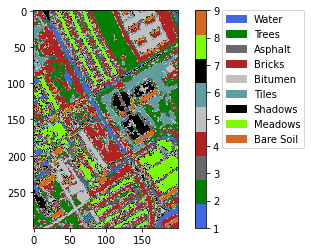

In [46]:
plt.imshow(naive_predict_masked, cmap = cmap_masked)
plt.legend(handles=patches_masked, bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0. )
plt.colorbar() # plot the color bar

**Minimum Euclidean distance classifier**

In [47]:
# predict labels for HSI dataset

HSI_reshp = np.reshape(HSI, (300*200, 103)) # reshape HSI

# predict labels
distances_euclidean = distance.cdist(average, HSI_reshp)
minimum_distances_eucl_pred = distances_euclidean.argmin(axis=0) + 1

# reshape prediction
eucl_predict_reshp = np.reshape(minimum_distances_eucl_pred, (300,200)) 

# mask zero values
eucl_predict_reshp_masked = np.ma.masked_equal(eucl_predict_reshp, 0) 

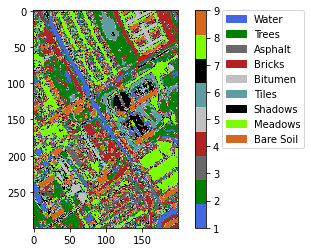

In [48]:
plt.imshow(eucl_predict_reshp_masked, cmap = cmap_masked)
plt.legend(handles=patches_masked, bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0. )
plt.colorbar() # plot the color bar

**k-nearest neighbor classifier**

In [49]:
# predict labels for HSI dataset

HSI_reshp = np.reshape(HSI, (300*200, 103)) # reshape HSI

# predict labels
neigh_predict = neigh_classifier.fit(train_hsi,train_labels).predict(HSI_reshp)

# reshape prediction
neigh_predict_reshp = np.reshape(neigh_predict, (300,200)) 

# mask zero values
neigh_predict_masked = np.ma.masked_equal(neigh_predict_reshp, 0) 

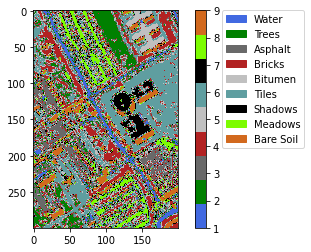

In [50]:
plt.imshow(neigh_predict_masked, cmap = cmap_masked)
plt.legend(handles=patches_masked, bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0. )
plt.colorbar() # plot the color bar

**Bayes classifier**

In [51]:
# predict labels for HSI dataset

HSI_reshp = np.reshape(HSI, (300*200, 103)) # reshape HSI

# predict labels
bayes_predict = module_bayes.predict(HSI_reshp)

# reshape prediction
bayes_predict_reshp = np.reshape(bayes_predict, (300,200)) 

# mask zero values
bayes_predict_reshp_masked = np.ma.masked_equal(bayes_predict_reshp, 0) 

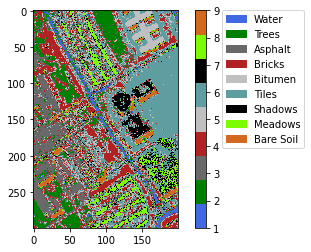

In [52]:
plt.imshow(bayes_predict_reshp_masked, cmap = cmap_masked)
plt.legend(handles=patches_masked, bbox_to_anchor=(1.3, 1), loc=2, borderaxespad=0. )
plt.colorbar() # plot the color bar

In [53]:
# set a function to plot each label in order to compare on a
# one-by-one basis

def function_to_plot_classifiers(endmember):

    fig, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(figsize = (30,20), nrows = 1, ncols = 5)

    divider5 = make_axes_locatable(ax5)
    
    cax5 = divider5.append_axes('right', size='5%', pad=0.05)
    
    im1 = ax1.imshow(np.ma.masked_where(naive_predict_masked != (endmember + 1), 
                                        naive_predict_masked), 
                     cmap = ListedColormap([color_dict[endmember + 1]]))
    im2 = ax2.imshow(np.ma.masked_where(eucl_predict_reshp_masked != (endmember + 1), 
                                        eucl_predict_reshp_masked), 
                     cmap = ListedColormap([color_dict[endmember + 1]]))
    im3 = ax3.imshow(np.ma.masked_where(neigh_predict_masked != (endmember + 1), 
                                        neigh_predict_masked), 
                     cmap = ListedColormap([color_dict[endmember + 1]]))
    im4 = ax4.imshow(np.ma.masked_where(bayes_predict_reshp_masked != (endmember + 1), 
                                        bayes_predict_reshp_masked), 
                     cmap = ListedColormap([color_dict[endmember + 1]]))
    
    im5 = ax5.imshow(np.ma.masked_where(labels != (endmember + 1), 
                                        labels), 
                     cmap = ListedColormap([color_dict[endmember + 1]]))
 
    fig.colorbar(im5, cax=cax5, orientation='vertical')    
        
    
    #plt.subplots_adjust(right = 1)
    
    ax1.set_title('Naive Bayes\nclassifier', 
                  fontsize = 25)
    ax2.set_title('Minimum Euclidean\ndistance classifier', fontsize = 25)
    ax3.set_title('k-nearest neighbor\nclassifier', fontsize = 25)
    ax4.set_title('Bayes classifier', fontsize = 25)
    ax5.set_title('Ground truth for\nendmember %d' % 
                  ((endmember+1)), fontsize = 25)
        # ax6.legend(handles=patches_masked, 
        #           bbox_to_anchor=(1.3, 1), 
        #           loc=2, borderaxespad=0.)
    fig.suptitle('Reconstructed abundance maps vs ground truth (Label %s) for %s' % 
                 ((endmember+1), materials_masked[endmember+1]), fontsize = 30, y= 0.75)
    
    

#### Water

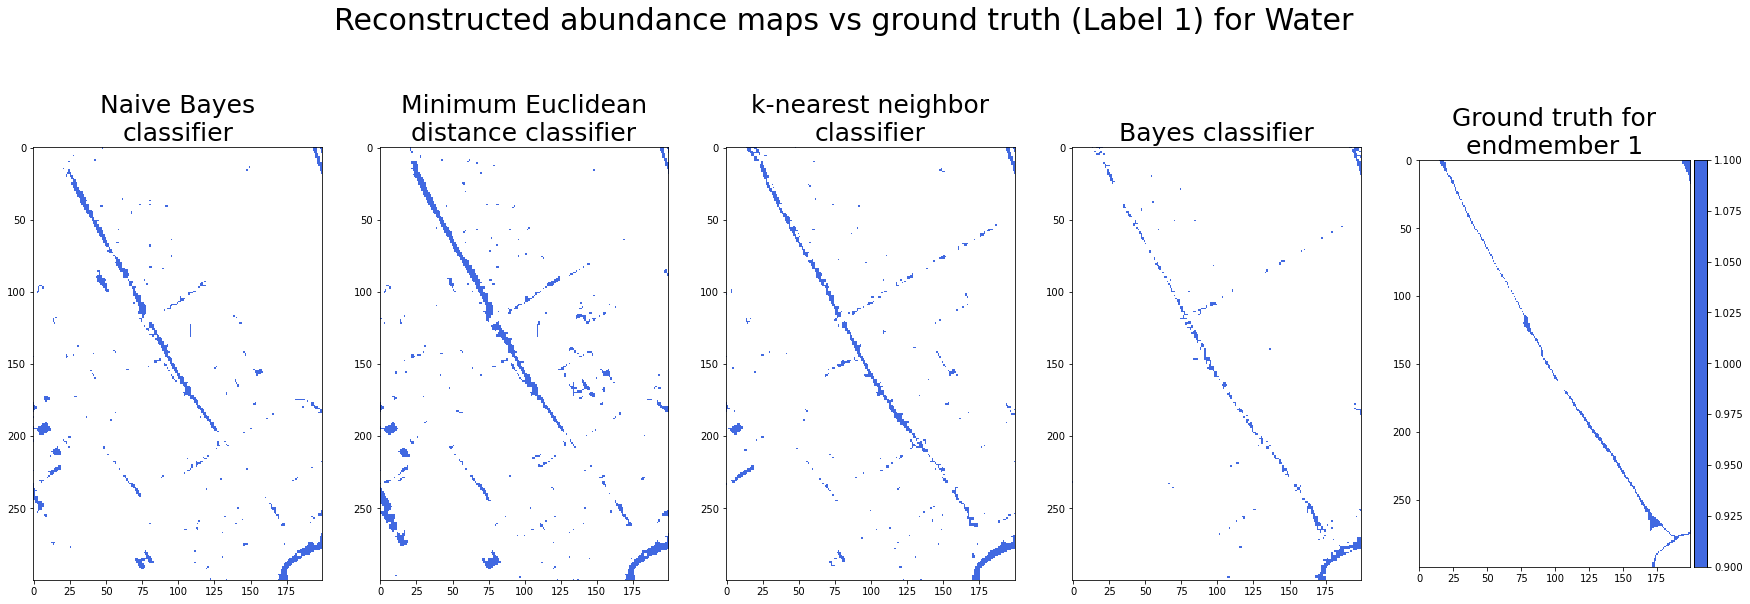

In [54]:
function_to_plot_classifiers(0)

Comparing the ground truth for water against the abundance maps of the classifiers I notice the following:

* The **Bayes** classifier succeeds in representing the torrent diagonally crossing the campus, while assigning label 1 to very few other landscape features. 
* The second best performance is of the **k-nearest neighbor** classifier, which also identifies the torrent, while incorrectly assigning label 1 to a few other landscape features. 
* The **Naive Bayes** classifier identifies the torrent but incorrectly assigns label 1 to a lot of other landscape features.
* Finally, the **Minimum Euclidean distance** classifier performs the worst; it identifies the torrent, but incorrectly assigns label 1 to many other landscape features.

#### Trees

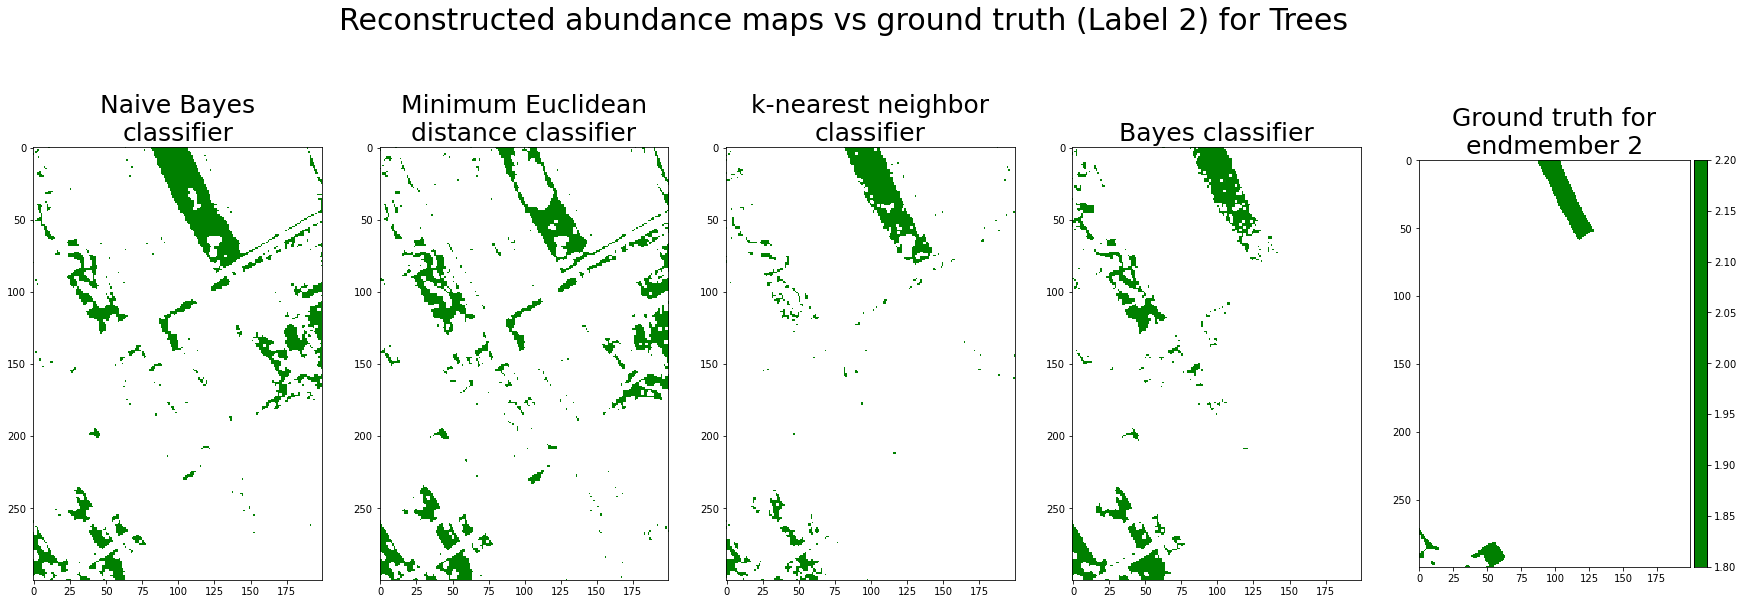

In [55]:
function_to_plot_classifiers(1)

Comparing the ground truth for trees against the abundance maps of the classifiers I notice the following:

* The **k-nearest neighbor** classifier succeeds in representing the trees at the north of the campus, while assigning label 2 to very few other landscape features. 
* The second best performance is of the **Bayes** classifier, which also identifies the trees, while incorrectly assigning label 2 to a few other landscape features. 
* The **Naive Bayes** classifier identifies the trees but incorrectly assigns label 2 to a lot of other landscape features.
* Finally, the **Minimum Euclidean distance** classifier performs the worst. It identifies the trees, but incorrectly assigns label 2 to many other features.

#### Asphalt

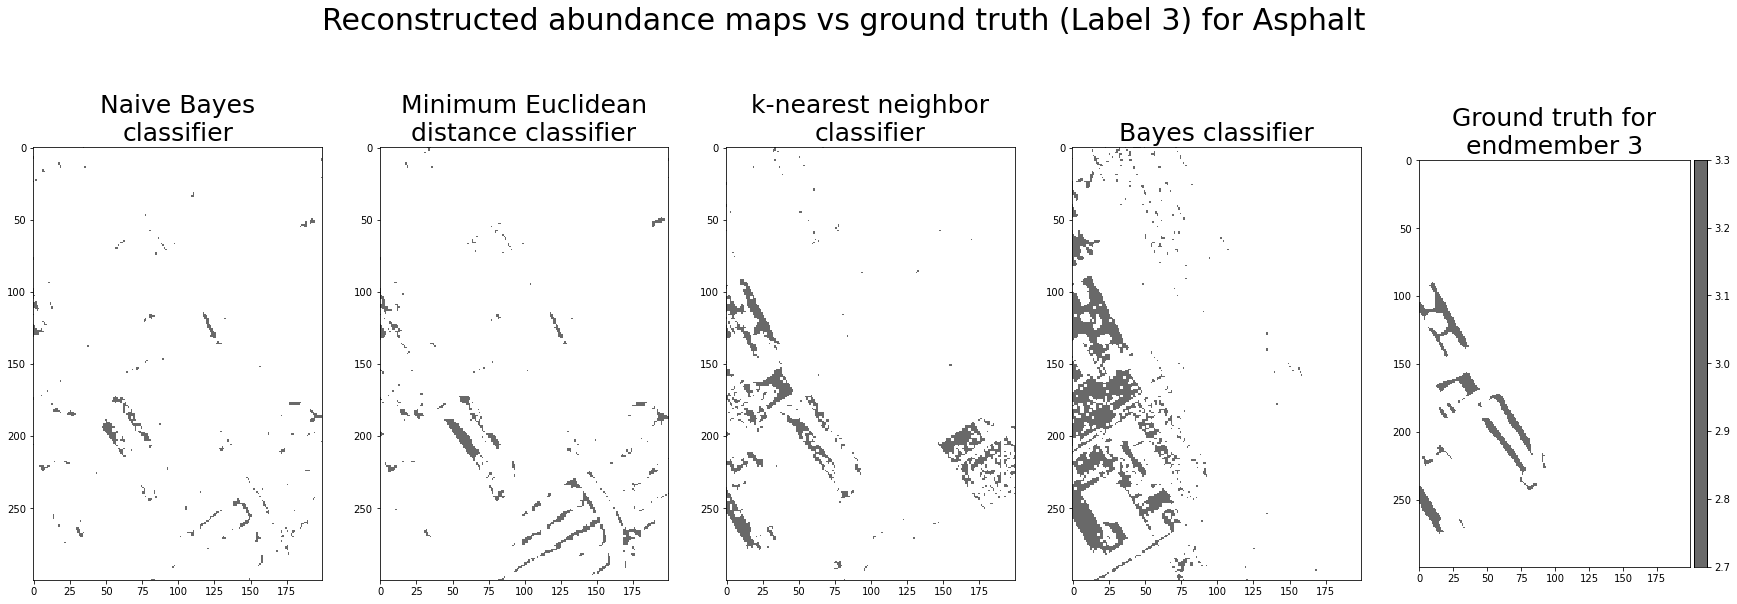

In [56]:
function_to_plot_classifiers(2)

Comparing the ground truth for asphalt against the abundance maps of the classifiers I notice the following:

* The **k-nearest neighbor** classifier succeeds in representing the network of roads (asphalt) at the west of the campus and only assigns label 3 to very few other landscape features. 
* The second best performance is of the **Bayes** classifier, which also identifies the roads (asphalt), while incorrectly assigning label 3 to few other landscape features. 
* The **Minimum Euclidean distance** classifier identifies very few roads (asphalt) and it incorrectly assigns label 3 to a lot of other landscape features.
* Finally, the **Naive Bayes** classifier performs the worst in identifying the roads (asphalt) and also incorrectly assigns label 3 to many other landscape features.

#### Bricks

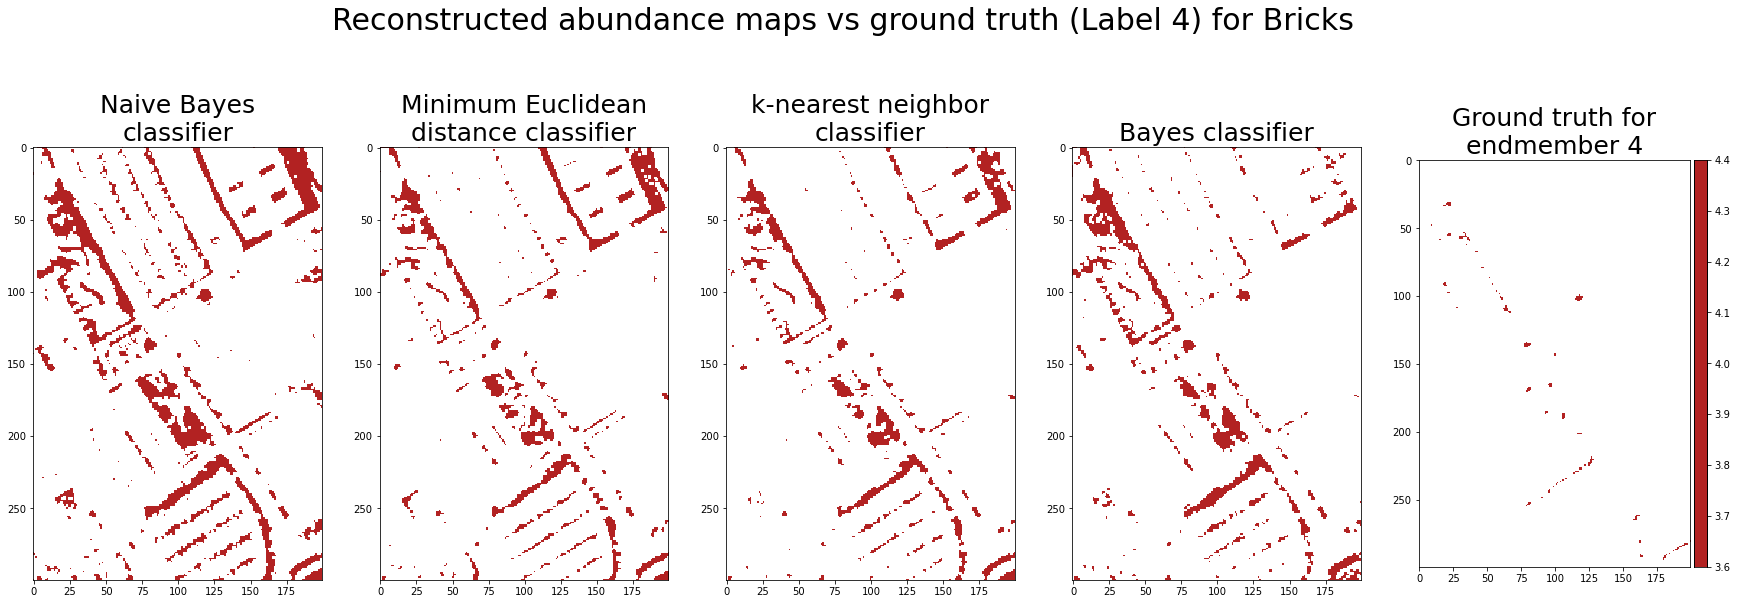

In [57]:
function_to_plot_classifiers(3)

Comparing the ground truth for bricks against the abundance maps of the classifiers I notice the following:

* All four classifiers perform poorly on the bricks label. While they identify the bricks, they all misidentify parts of the roads, meadows and torrent as bricks.

#### Bitumen

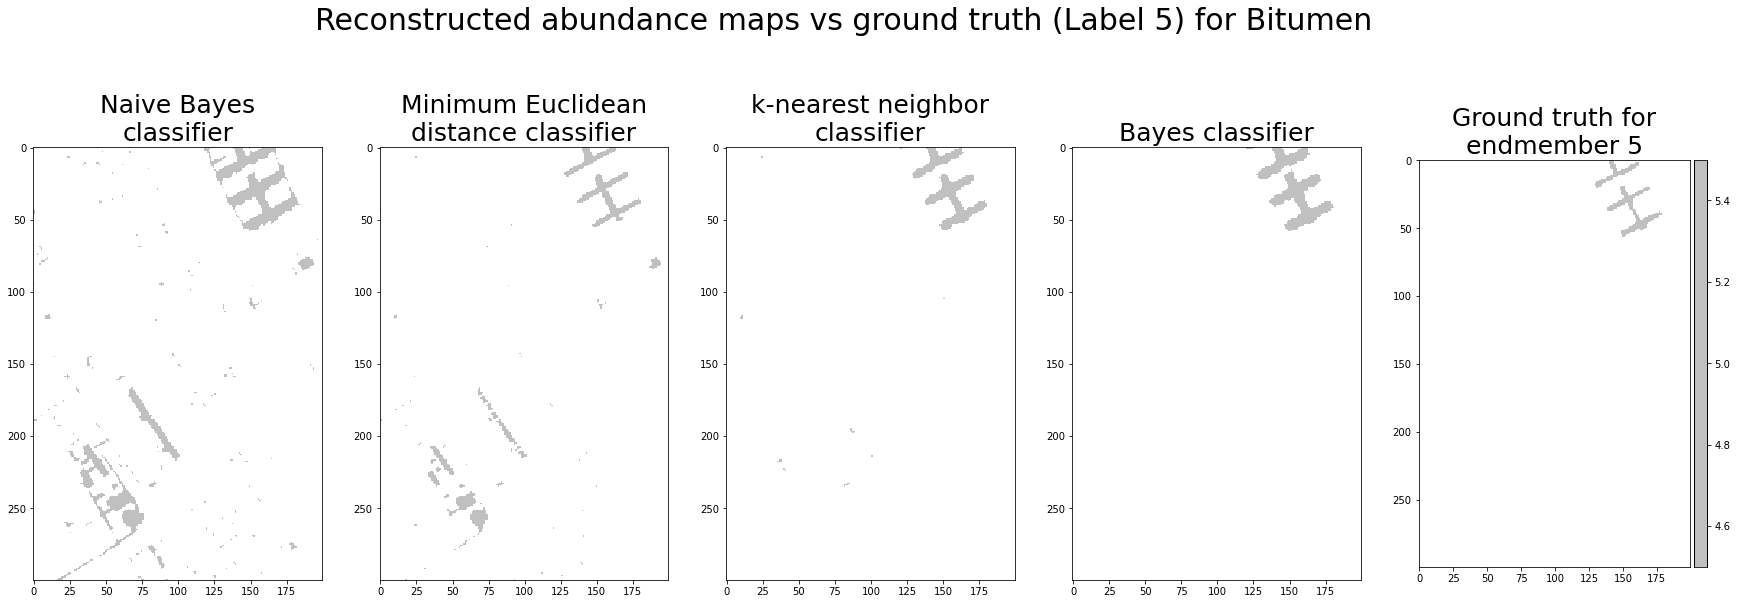

In [58]:
function_to_plot_classifiers(4)

Comparing the ground truth for bitumen against the abundance maps of the classifiers I notice the following:

* The **Bayes** and **k-nearest neighbor** classifiers perform the best; they only assign label 5 to the elements that the ground truth dictates as correct. 
* The **Minimum Euclidean distance** classifier also identifies almost all pixels with label 5 but it also incorrectly lables other landscape features as bitumen.
* Finally, the **Naive Bayes** classifier performs the worst. It identifies almost all pixels with label 5 but incorrectly assigns label 5 to many other features.

#### Tiles

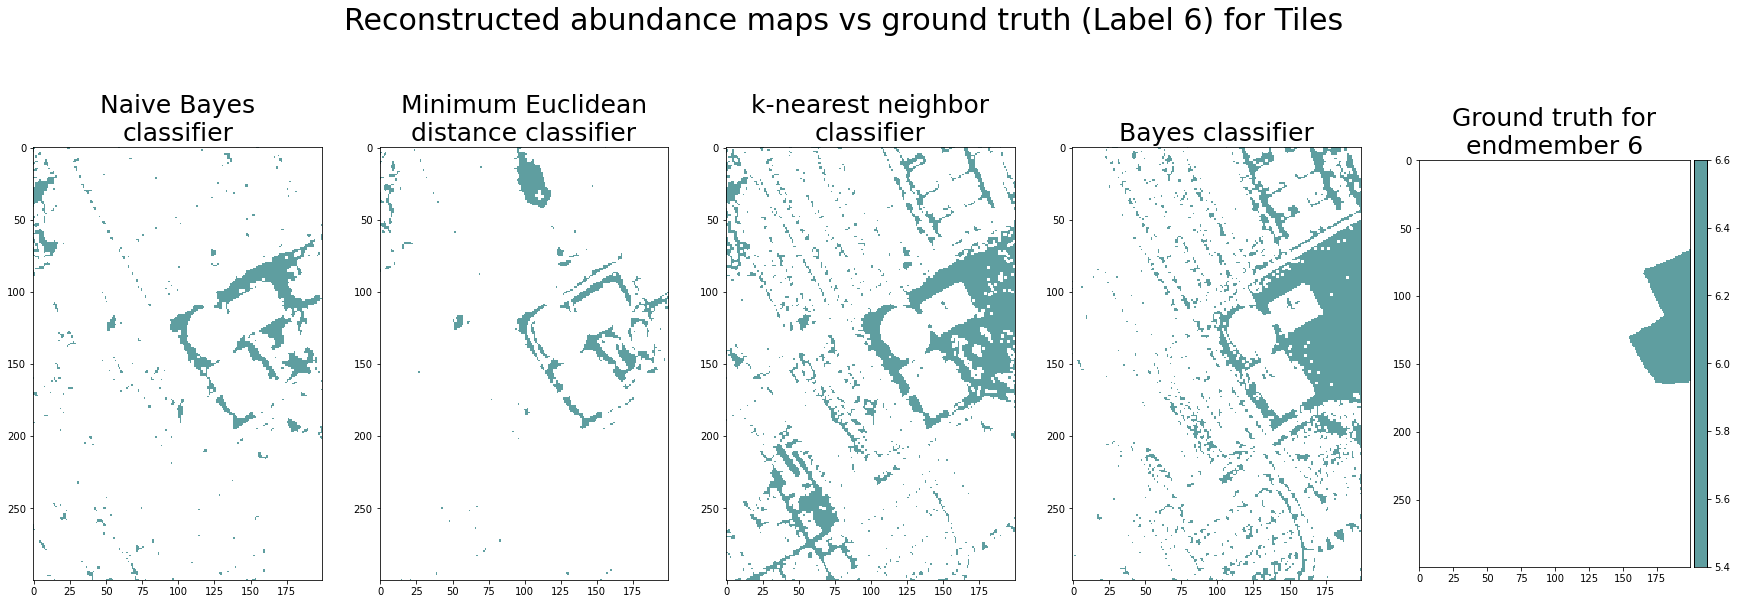

In [59]:
function_to_plot_classifiers(5)

Comparing the ground truth for tiles against the abundance maps of the classifiers I notice the following:

* The **Bayes** classifier succeeds in identifying the tiles but it assigns label 6 to other landscape features too, i.e. it misinterprets the signal.
* The second best performance is of the **k-nearest neighbor classifier** classifier, which also identifies the tiles, while incorrectly assigning label 6 to a few other landscape features. 
* The **Naive Bayes** classifier identifies very few tiles and it incorrectly assigns label 6 to a lot of other landscape features.
* Finally, the **Minimum Euclidean distance** classifier performs the worst by identifying the least of the tiles and incorrectly assigning label 6 to many other landscape features.

**<span style="font-size:1.2em; color: black">In all four cases, the result in identifying the tiles is not satisfactory.</span>**

#### Shadows

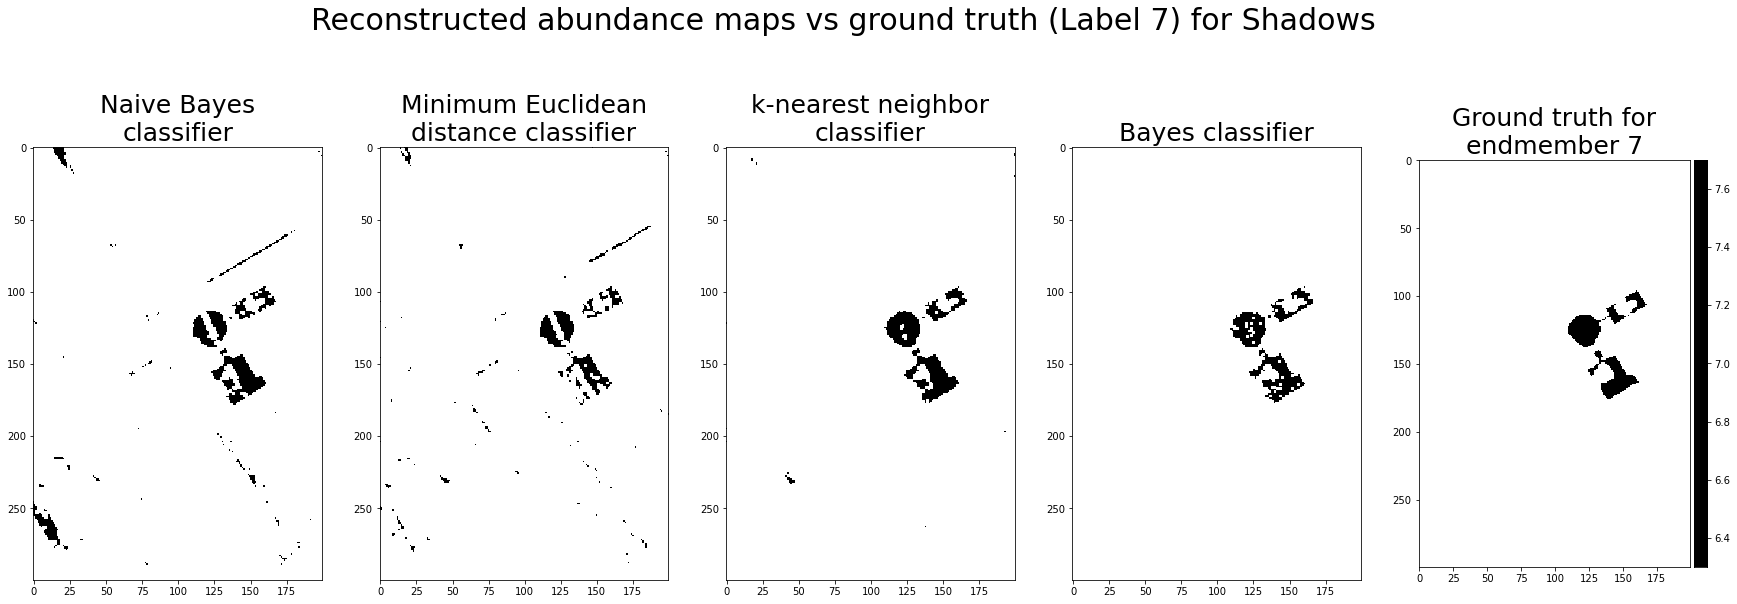

In [60]:
function_to_plot_classifiers(6)

Comparing the ground truth for shadows against the abundance maps of the classifiers I notice the following:

* THe best performance is that of the **Bayes** classifier, which identifies the shadows with less accuracy than that of the **k-nearest neighbor**, but it doesn't misidentify any other landscape feature.
* The **k-nearest neighbor** classifier succeeds in representing the shadow almost to its full extent, while assigning label 7 to very few other lanscape features. 
* The third best performance is of the **Minimum Euclidean distance** classifier, which also identifies the shadows with less accuracy than that of the  **Bayes** and **k-nearest neighbor** classifierts, but incorrectly asigns label 7 to many other lanscape features.
* Finally, the **Naive Bayes** classifier performs the worst. It identifies the shadows but incorrectly assigns label 7 to many other lanscape features.

#### Meadows

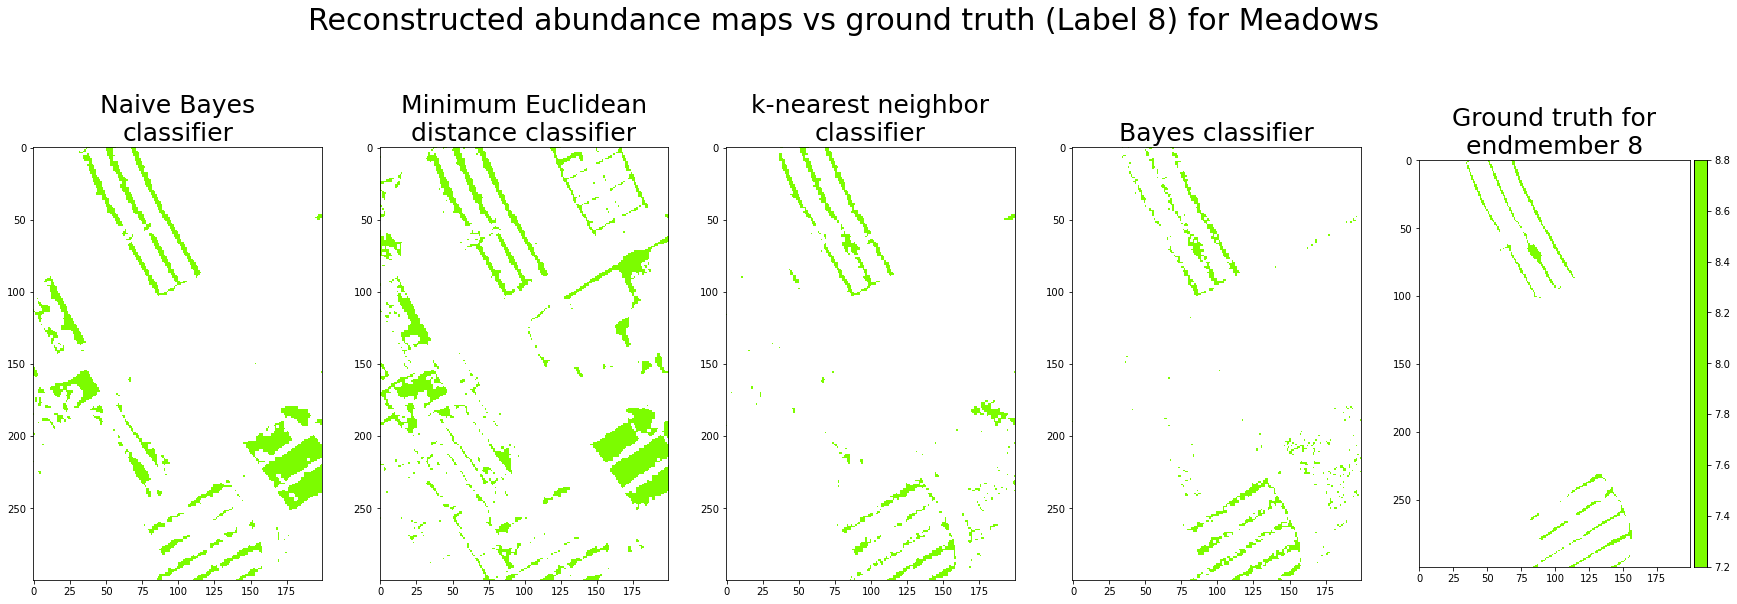

In [61]:
function_to_plot_classifiers(7)

Comparing the ground truth for meadows against the abundance maps of the classifiers I notice the following:

* The **Bayes** classifier succeeds in representing the meadows of the campus to their full extent and only assigns label 8 to very few other landscape features. 
* The second best performance is of the **k-nearest neighbor** classifier, which also fully identifies the meadows, while incorrectly assigning label 8 to a few other landscape features. 
* The **Naive Bayes** classifier fully identifies the meadows, but it incorrectly assigns label 8 to a lot of other landscape features.
* Finally, the **Minimum Euclidean distance** classifier performs the worst. It fully identifies the meadowsbut incorrectly assigns label 8 to many other landscape features.

#### Bare Soil

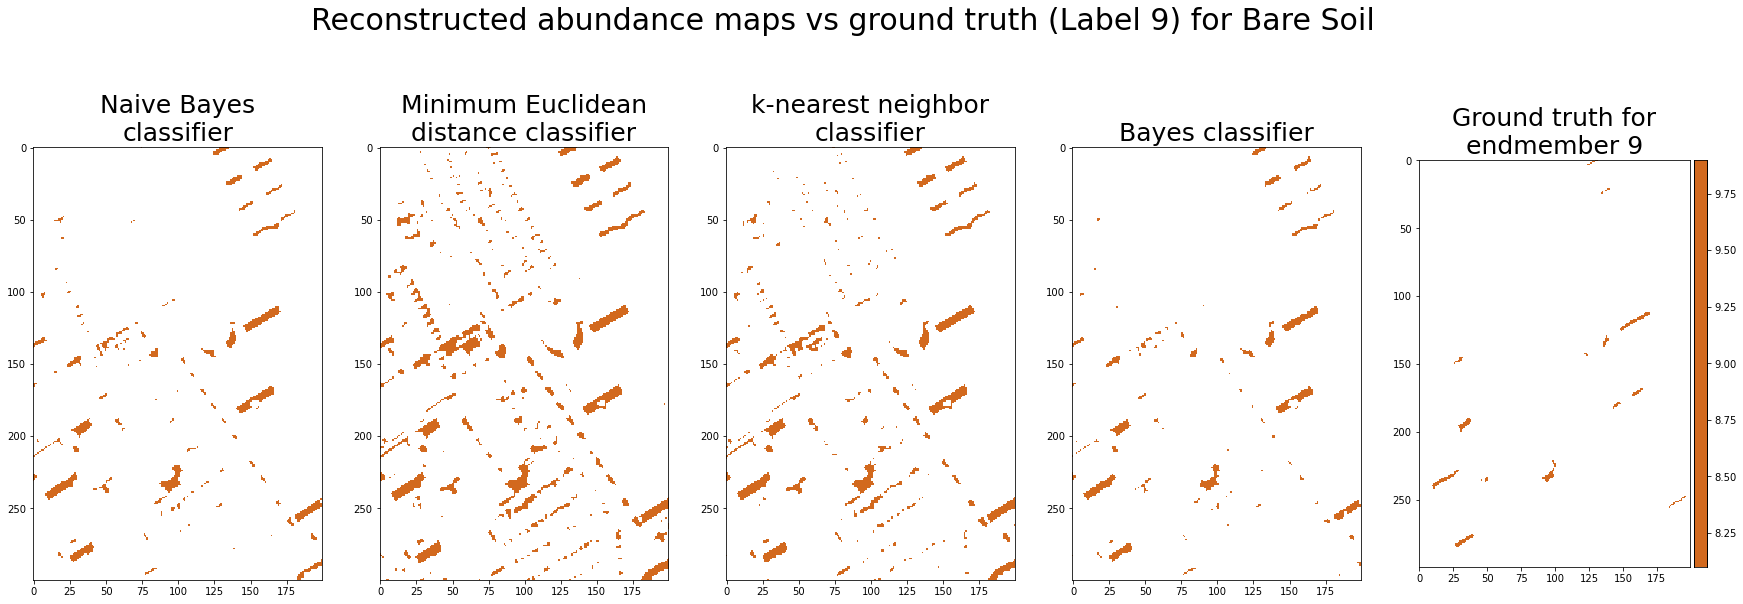

In [62]:
function_to_plot_classifiers(8)

Comparing the ground truth for bare soil against the abundance maps of the classifiers I notice the following:

* The **Naive Bayes** and **Bayes** classifiers perform equally well. They identify the bare soil to its full extent and only assign label 9 to a few other landscape features. 
* The second best performance is of the **Minimum Euclidean distance** and **k-nearest neighbor classifier** classifiers, which also fully identify the bare soil, while incorrectly assigning the label 9 to many other landscape features. 

**<span style="font-size:1.2em; color: black">None of the four classifiers are satisfactory in identifying the tiles.</span>**

**<span style="font-size:1.3em; color: black">Summing up, taking into account the estimated validation error, the correlation matrices and the abundance maps of the four classifier I conclude that the "winner" is the Bayes classifier, followed by the k-nearest neighbor classifier.</span>**